# Homework 1: Perceptron Algorithm

## Name: Sujeong Cha   /   NetID: sjc433

In [1]:
# Load necessary packages and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("spam_train.txt", sep='\n', header=None, names = ['email'])
data['label'] = [x.split(" ", 1)[0] for x in data['email']]
data['label'] = [-1 if x == '0' else 1 for x in data['label'] ]
data['email'] = [x.split(" ", 1)[1] for x in data['email']]

## Problem 1

In [2]:
# Randomly split into the training and validation set
def train_valid_split(data, N):
    train, valid = data.loc[:N-1, :], data.loc[4000:, :]   # Size of validation set is fixed
    return train, valid

train = train_valid_split(data, 4000)[0]
valid = train_valid_split(data, 4000)[1]

display(train.head())
display(valid.head())

,email,label
0,public announc the new domain name ar final av...,1
1,have tax problem do you ow the ir monei if you...,1
2,r robert harlei write r scuse me for post in g...,-1
3,on wed number oct number brian fahrland wrote ...,-1
4,quot ronan waid sure but soft link would do th...,-1


,email,label
4000,onc upon a time yen wrote how do i instal add ...,-1
4001,i receiv a spam email that had appar forg the ...,-1
4002,mother natur all natur marit aid for men and w...,1
4003,dear sir ve ve numberjbnumb numberbt ve we hav...,1
4004,httpaddr act dtl open argument ar set to begin...,-1


If we had not created the validation set, the model might overfit on the training data and lose generalizability to other unseen data.

## Problem 2 

In [3]:
# Build a vocabulary list
def build_vocab_list(train, min_email):
    train_splits = [str(x).split(" ") for x in train['email']]
    train_splits_set = [list(set(x)) for x in train_splits]
    
    vocab = {}
    for row in train_splits_set:
        for word in row:
            if word in vocab.keys(): vocab[word] += 1
            else: vocab[word] = 1
    
    vocablist = []
    for (key, value) in vocab.items():
        if value >= min_email: vocablist.append(key)
    
    return vocablist

vocablist = build_vocab_list(train, 30)

print("The length of our vocabulary list is " + str(len(vocablist)) + ".")

The length of our vocabulary list is 2376.


In [4]:
# Transform all of the data into feature vectors
def to_feature_vector(data, vlist):
    splits = [str(x).split(" ") for x in data['email']]
    feature_all = []
    for row in splits:
        feature = [1 if x in row else 0 for x in vlist]
        feature_all.append(feature)
    return np.array(feature_all)

train_fvec = to_feature_vector(train, vocablist)
valid_fvec = to_feature_vector(valid, vocablist)

In [5]:
train['email'], valid['email'] = list(train_fvec), list(valid_fvec)

display(train.head())
display(valid.head())

,email,label
0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1
1,"[0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, ...",1
2,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",-1
3,"[0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, ...",-1
4,"[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, ...",-1


,email,label
4000,"[0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, ...",-1
4001,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, ...",-1
4002,"[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, ...",1
4003,"[0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, ...",1
4004,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, ...",-1


## Problem 3

In [6]:
# Implement the function 'perceptron_train'
def perceptron_train(data):
    w, klist, epoch = np.zeros(len(vocablist)), [0], 0
    for i in range(1, 1000):
        k = 0
        for j in range(len(data)):
            if data['email'][j].sum() == 0: continue
            if data['label'][j] * w.dot(data['email'][j]) <= 0:
                w += data['label'][j] * data['email'][j]
                k += 1
        klist.append(k)
        epoch += 1
        if klist[i] == 0: break
    return w, sum(klist), epoch

In [7]:
# Implement the function 'perceptron_test'
def perceptron_test(w, data):
    misclassified = 0
    for i in range(len(data)):
        if data['email'][i].sum() == 0: continue
        if data['label'][i] * w.dot(data['email'][i]) <= 0:
            misclassified += 1
    test_error = misclassified / len(data)
    return test_error

## Problem 4

In [8]:
# Train the classifier with training set
weight, mistake, epoch = perceptron_train(train)
print(mistake, "mistakes are made before the algorithm terminates.")

437 mistakes are made before the algorithm terminates.


In [9]:
# Test the above implementation with training set
tr_error = perceptron_test(weight, train)
print("Our training error is", tr_error, ".")

Our training error is 0.0 .


In [10]:
# Test the above implementation with validation set
va_error = perceptron_test(weight, valid.reset_index())
print("Our validation error is", va_error, ".")

Our validation error is 0.013 .


## Problem 5

In [11]:
# Create a dataframe with words and their weights
vocabdf = pd.DataFrame(weight, index = vocablist, columns = ['weight'])
vocabdf = vocabdf.sort_values('weight')

In [12]:
# Top 15 words with the most positive weights
print("List of 15 words with the most POSITIVE weights:")
display(vocabdf[-15:][::-1].T)

List of 15 words with the most POSITIVE weights:


,sight,click,market,remov,these,our,deathtospamdeathtospamdeathtospam,most,parti,ever,yourself,present,basenumb,guarante,pleas
weight,22.0,18.0,16.0,16.0,16.0,15.0,14.0,13.0,12.0,12.0,12.0,12.0,11.0,11.0,11.0


In [13]:
# Top 15 words with the most negative weights
print("List of 15 words with the most NEGATIVE weights:")
display(vocabdf[:15].T)

List of 15 words with the most NEGATIVE weights:


,wrote,reserv,prefer,copyright,technolog,i,still,someth,recipi,comput,but,which,coupl,url,date
weight,-16.0,-15.0,-14.0,-13.0,-12.0,-12.0,-12.0,-11.0,-11.0,-11.0,-11.0,-11.0,-10.0,-10.0,-10.0


## Problem 6

In [14]:
# Implement the averaged perceptron algorithm
def perceptron_train_avg(data):
    w, wcount, klist, epoch = np.zeros(len(vocablist)), 0, [0], 0
    w_accum = np.zeros(len(vocablist))
    for i in range(1, 100):
        k = 0
        for j in range(len(data)):
            if data['email'][j].sum() == 0: continue
            if data['label'][j] * w.dot(data['email'][j]) <= 0:
                w += data['label'][j] * data['email'][j]
                k += 1
            w_accum += w
            wcount += 1
        klist.append(k)
        epoch += 1
        if klist[i] == 0: break
    return w_accum / wcount, sum(klist), epoch

In [15]:
# Train the average perceptron classifier with training set
weight_avg, mistake_avg, epoch_avg = perceptron_train_avg(train)
print(mistake_avg, "mistakes are made before the algorithm terminates.")

437 mistakes are made before the algorithm terminates.


In [16]:
# Test the above implementation with training set
tr_error_avg = perceptron_test(weight_avg, train)
print("Our training error is", tr_error_avg, ".")

Our training error is 0.00075 .


In [17]:
# Test the above implementation with validation set
va_error_avg = perceptron_test(weight_avg, valid.reset_index())
print("Our validation error is", va_error_avg, ".")

Our validation error is 0.016 .


## Problem 7 

In [18]:
# Run the perceptron and average perceptron algorithm with different training size

N = [100, 200, 400, 800, 2000, 4000]

perceptron_ve = []
perceptron_iter = []

avg_perceptron_ve = []
avg_perceptron_iter = []

for n in N:    
    data = pd.read_csv("spam_train.txt", sep='\n', header=None, names = ['email'])
    data['label'] = [x.split(" ", 1)[0] for x in data['email']]
    data['label'] = [-1 if x == '0' else 1 for x in data['label']]
    data['email'] = [x.split(" ", 1)[1] for x in data['email']]

    train, valid = train_valid_split(data, n)

    vocablist = build_vocab_list(train, 30)
    
    train_fvec = to_feature_vector(train, vocablist)
    valid_fvec = to_feature_vector(valid, vocablist)
    train['email'], valid['email'] = list(train_fvec), list(valid_fvec)
    
    weight, mistake, epoch = perceptron_train(train)
    va_error = perceptron_test(weight, valid.reset_index())
    perceptron_ve.append(va_error)
    perceptron_iter.append(epoch)
    
    weight_avg, mistake_avg, epoch_avg = perceptron_train_avg(train)
    va_error_avg = perceptron_test(weight_avg, valid.reset_index())
    avg_perceptron_ve.append(va_error_avg)
    avg_perceptron_iter.append(epoch_avg)

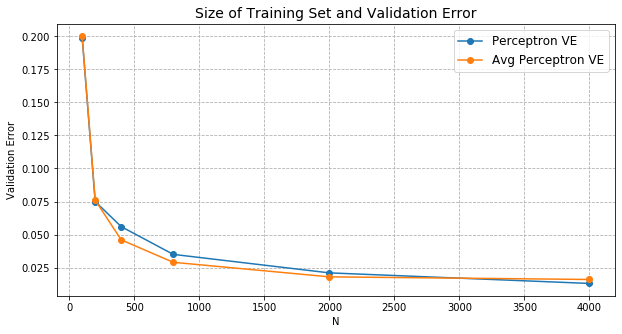

In [19]:
# Plot the validation errors
val_err_df = pd.DataFrame(list(zip(N, perceptron_ve, avg_perceptron_ve)), 
                          columns = ['N', 'Perceptron VE', "Avg Perceptron VE"])

plt.figure(figsize=(10,5))
plt.grid('gray', linestyle = '--')
plt.plot(val_err_df['N'], val_err_df['Perceptron VE'], marker = 'o')
plt.plot(val_err_df['N'], val_err_df['Avg Perceptron VE'], marker = 'o')
plt.title("Size of Training Set and Validation Error", fontsize = 14)
plt.xlabel("N")
plt.ylabel("Validation Error")
plt.legend(val_err_df.columns[1:], fontsize = 12)
plt.show()

## Problem 8

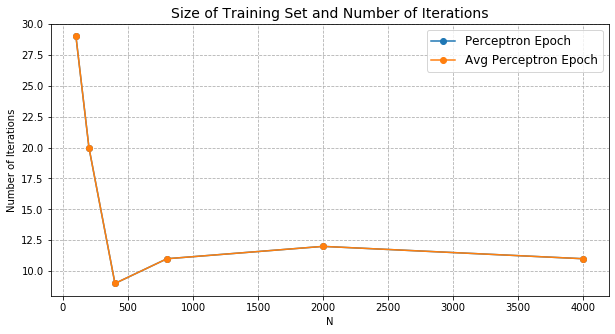

In [20]:
# Plot the number of perceptron iterations

iter_df = pd.DataFrame(list(zip(N, perceptron_iter, avg_perceptron_iter)), 
                          columns = ['N', 'Perceptron Epoch', "Avg Perceptron Epoch"])

plt.figure(figsize=(10,5))
plt.grid('gray', linestyle = '--')
plt.plot(iter_df['N'], iter_df['Perceptron Epoch'], marker = 'o')
plt.plot(iter_df['N'], iter_df['Avg Perceptron Epoch'], marker = 'o')
plt.title("Size of Training Set and Number of Iterations", fontsize = 14)
plt.xlabel("N")
plt.ylabel("Number of Iterations")
plt.legend(iter_df.columns[1:], fontsize = 12)
plt.show()

## Problem 9

In [21]:
# Implement the function 'perceptron_train' with max_iter parameter
def perceptron_train(data, max_iter):
    w, klist, epoch = np.zeros(len(vocablist)), [0], 0
    for i in range(1, max_iter):
        k = 0
        for j in range(len(data)):
            if data['email'][j].sum() == 0: continue
            if data['label'][j] * w.dot(data['email'][j]) <= 0:
                w += data['label'][j] * data['email'][j]
                k += 1
        klist.append(k)
        epoch += 1
        if klist[i] == 0: break
    return w, sum(klist), epoch

In [22]:
# Implement the 'averaged perceptron algorithm' with max_iter parameter
def perceptron_train_avg(data, max_iter):
    w, wcount, klist, epoch = np.zeros(len(vocablist)), 0, [0], 0
    w_accum = np.zeros(len(vocablist))
    for i in range(1, max_iter):
        k = 0
        for j in range(len(data)):
            if data['email'][j].sum() == 0: continue
            if data['label'][j] * w.dot(data['email'][j]) <= 0:
                w += data['label'][j] * data['email'][j]
                k += 1
            w_accum += w
            wcount += 1
        klist.append(k)
        epoch += 1
        if klist[i] == 0: break
    return w_accum / wcount, sum(klist), epoch

In [23]:
# Try various maximum number of iterations
max_iter = range(2, 15)

perceptron_ve = []
perceptron_iter = []

avg_perceptron_ve = []
avg_perceptron_iter = []

data = pd.read_csv("spam_train.txt", sep='\n', header=None, names = ['email'])
data['label'] = [x.split(" ", 1)[0] for x in data['email']]
data['label'] = [-1 if x == '0' else 1 for x in data['label']]
data['email'] = [x.split(" ", 1)[1] for x in data['email']]

train, valid = train_valid_split(data, 4000)

vocablist = build_vocab_list(train, 30)

train_fvec = to_feature_vector(train, vocablist)
valid_fvec = to_feature_vector(valid, vocablist)
train['email'], valid['email'] = list(train_fvec), list(valid_fvec)

for m in max_iter: 
    weight, mistake, epoch = perceptron_train(train, m)
    va_error = perceptron_test(weight, valid.reset_index())
    perceptron_ve.append(va_error)
    perceptron_iter.append(epoch)
    
    weight_avg, mistake_avg, epoch_avg = perceptron_train_avg(train, m)
    va_error_avg = perceptron_test(weight_avg, valid.reset_index())
    avg_perceptron_ve.append(va_error_avg)
    avg_perceptron_iter.append(epoch_avg)

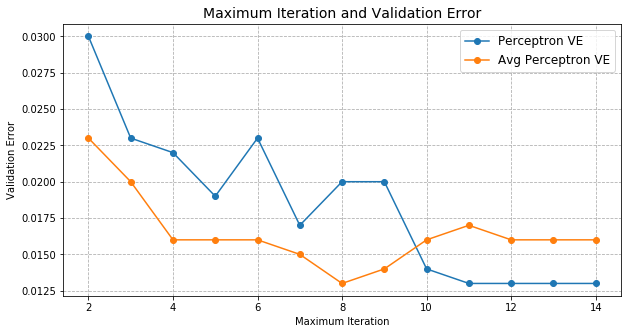

In [24]:
# Plot the validation errors
val_err_df = pd.DataFrame(list(zip(max_iter, perceptron_ve, avg_perceptron_ve)), 
                          columns = ['max_iter', 'Perceptron VE', "Avg Perceptron VE"])

plt.figure(figsize=(10,5))
plt.grid('gray', linestyle = '--')
plt.plot(val_err_df['max_iter'], val_err_df['Perceptron VE'], marker = 'o')
plt.plot(val_err_df['max_iter'], val_err_df['Avg Perceptron VE'], marker = 'o')
plt.title("Maximum Iteration and Validation Error", fontsize = 14)
plt.xlabel("Maximum Iteration")
plt.ylabel("Validation Error")
plt.legend(val_err_df.columns[1:], fontsize = 12)
plt.show()

In [25]:
display(val_err_df)
print("Best max_iter for Perceptron Algorithm:", val_err_df.iloc[val_err_df['Perceptron VE'].idxmin(), 0])
print("Best max_iter for Average Perceptron Algorithm:", val_err_df.iloc[val_err_df['Avg Perceptron VE'].idxmin(), 0])

,max_iter,Perceptron VE,Avg Perceptron VE
0,2,0.030,0.023
1,3,0.023,0.020
2,4,0.022,0.016
3,5,0.019,0.016
4,6,0.023,0.016
5,7,0.017,0.015
6,8,0.020,0.013
7,9,0.020,0.014
8,10,0.014,0.016
9,11,0.013,0.017


Best max_iter for Perceptron Algorithm: 11
Best max_iter for Average Perceptron Algorithm: 8


## Problem 10

In [26]:
# Change the minimum number of emails condition for vocablist
min_email = [10, 20, 30]

perceptron_ve = []
perceptron_iter = []

avg_perceptron_ve = []
avg_perceptron_iter = []

data = pd.read_csv("spam_train.txt", sep='\n', header=None, names = ['email'])
data['label'] = [x.split(" ", 1)[0] for x in data['email']]
data['label'] = [-1 if x == '0' else 1 for x in data['label']]
data['email'] = [x.split(" ", 1)[1] for x in data['email']]

train, valid = train_valid_split(data, 4000)

for length in min_email:    
    vocablist = build_vocab_list(train, length)
    
    train_fvec = to_feature_vector(train, vocablist)
    valid_fvec = to_feature_vector(valid, vocablist)
    train['email'], valid['email'] = list(train_fvec), list(valid_fvec)
    
    weight, mistake, epoch = perceptron_train(train, 11)
    va_error = perceptron_test(weight, valid.reset_index())
    perceptron_ve.append(va_error)
    perceptron_iter.append(epoch)
    
    weight_avg, mistake_avg, epoch_avg = perceptron_train_avg(train, 8)
    va_error_avg = perceptron_test(weight_avg, valid.reset_index())
    avg_perceptron_ve.append(va_error_avg)
    avg_perceptron_iter.append(epoch_avg)

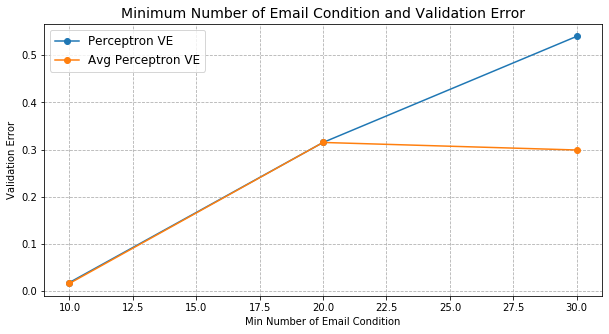

In [27]:
# Plot the validation errors
val_err_df = pd.DataFrame(list(zip(min_email, perceptron_ve, avg_perceptron_ve)), 
                          columns = ['min_email', 'Perceptron VE', "Avg Perceptron VE"])

plt.figure(figsize=(10,5))
plt.grid('gray', linestyle = '--')
plt.plot(val_err_df['min_email'], val_err_df['Perceptron VE'], marker = 'o')
plt.plot(val_err_df['min_email'], val_err_df['Avg Perceptron VE'], marker = 'o')
plt.title("Minimum Number of Email Condition and Validation Error", fontsize = 14)
plt.xlabel("Min Number of Email Condition")
plt.ylabel("Validation Error")
plt.legend(val_err_df.columns[1:], fontsize = 12)
plt.show()

In [28]:
display(val_err_df)
print("Best min_email for Perceptron Algorithm:", val_err_df.iloc[val_err_df['Perceptron VE'].idxmin(), 0])
print("Best min_email for Average Perceptron Algorithm:", val_err_df.iloc[val_err_df['Avg Perceptron VE'].idxmin(), 0])
print("> As both combinations are quite close in terms of valiedation error, we test both algorithms for Problem 11.")

,min_email,Perceptron VE,Avg Perceptron VE
0,10,0.018,0.016
1,20,0.315,0.315
2,30,0.540,0.299


Best min_email for Perceptron Algorithm: 10
Best min_email for Average Perceptron Algorithm: 10
> As both combinations are quite close in terms of valiedation error, we test both algorithms for Problem 11.


## Problem 11

In [29]:
# Load the full training data
fulldata = pd.read_csv("spam_train.txt", sep='\n', header=None, names = ['email'])
fulldata['label'] = [x.split(" ", 1)[0] for x in fulldata['email']]
fulldata['label'] = [-1 if x == '0' else 1 for x in fulldata['label'] ]
fulldata['email'] = [x.split(" ", 1)[1] for x in fulldata['email']]

In [30]:
# Learn using the best configurations
# 1) (algo = Perceptron, min_email = 10, max_iter = 11)
# 2) (algo = Average Perceptron, min_email = 10, max_iter = 8)
vocablist = build_vocab_list(fulldata, 10)
   
fulldata_fvec = to_feature_vector(fulldata, vocablist)
fulldata['email'] = list(fulldata_fvec)
    
weight, mistake, epoch = perceptron_train(fulldata, 11)
print("Training Error of Perceptron Algorithm", perceptron_test(weight, fulldata))

weight_avg, mistake_avg, epoch_avg = perceptron_train_avg(fulldata, 8)
print("Training Error of Average Perceptron Algorithm", perceptron_test(weight_avg, fulldata))

Training Error of Perceptron Algorithm 0.0002
Training Error of Average Perceptron Algorithm 0.001


In [34]:
# Load the test set
testdata = pd.read_csv("spam_test.txt", sep='\n', header=None, names = ['email'])
testdata['label'] = [x.split(" ", 1)[0] for x in testdata['email']]
testdata['label'] = [-1 if x == '0' else 1 for x in testdata['label']]
testdata['email'] = [x.split(" ", 1)[1] for x in testdata['email']]

In [35]:
# Error for the test set
test_fvec = to_feature_vector(testdata, vocablist)
testdata['email'] = list(test_fvec)
print("Test Error of Perceptron Algorithm", perceptron_test(weight, testdata))
print("Test Error of Average Perceptron Algorithm", perceptron_test(weight_avg, testdata))
print("\nOur final model is Average Perceptron (min_email = 10, max_iter 8) with validation error of", perceptron_test(weight_avg, testdata))

Test Error of Perceptron Algorithm 0.018
Test Error of Average Perceptron Algorithm 0.017

Our final model is Average Perceptron (min_email = 10, max_iter 8) with validation error of 0.017
